<a href="https://www.kaggle.com/code/swish9/eda-tomato-prices?scriptVersionId=122346374" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv('/kaggle/input/tomato-daily-prices/Tomato.csv')

In [3]:
df.sample(10)

,Date,Unit,Minimum,Maximum,Average,Market
1359,2017-06-30,Kg,25,30,27.5,Tomato
1165,2016-12-14,Kg,30,35,32.5,Tomato
1128,2016-11-07,Kg,30,40,35.0,Tomato
1378,2017-07-19,Kg,35,40,37.5,Tomato
2672,2021-03-06,Kg,15,20,17.5,Tomato
2445,2020-07-19,Kg,12,18,15.0,Tomato
1240,2017-02-28,Kg,20,25,22.5,Tomato
1525,2017-12-15,Kg,40,45,42.5,Tomato
348,2014-08-22,Kg,50,55,52.5,Tomato
232,2014-04-10,Kg,30,40,35.0,Tomato


I feel it is safe to drop unit and market as it's fixed.

**UNIT - KGs**

**MARKET - TOMATO**

In [4]:
df.drop(['Unit','Market'],inplace=True,axis = 1)

In [5]:
df.sample(2)

,Date,Minimum,Maximum,Average
528,2015-03-13,30,36,33.0
2368,2020-05-01,20,25,22.5


> Now I feel we should have a look over the date feature

In [6]:
df.Date.isnull().sum()

0

In [7]:
df.dtypes

Date        object
Minimum      int64
Maximum      int64
Average    float64
dtype: object

> For starters we'll have to typecast Date into datetime datatype from object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

Now I feel our base for comparison should be month and year so i'll be creating new columns consinsting of year and month when the tomato prices where recorded.

Creating column for year

In [9]:
df['year'] = df['Date'].dt.year

In [10]:
df.year.sample(5)

720     2015
2124    2019
1699    2018
1545    2018
2654    2021
Name: year, dtype: int64

Creating column for month

In [11]:
df['monthNo'] = df['Date'].dt.month

In [12]:
df.monthNo.sample(5)

2210    11
2735     5
406     10
1863    11
1466    10
Name: monthNo, dtype: int64

> Now we have 2 additional columns, Now I guess it will be safe to drop date feature

In [13]:
date = df.Date
df.drop(['Date'],axis=1)

,Minimum,Maximum,Average,year,monthNo
0,26,32,29.0,2013,6
1,20,25,22.5,2013,6
2,22,26,24.0,2013,6
3,24,28,26.0,2013,6
4,22,26,24.0,2013,6
...,...,...,...,...,...
2736,10,15,12.5,2021,5
2737,10,15,12.5,2021,5
2738,10,15,12.5,2021,5
2739,30,35,32.5,2021,5


In [14]:
date.head(2) # I've stored the actual feature in new column in case it's required again.

0   2013-06-16
1   2013-06-17
Name: Date, dtype: datetime64[ns]

# EDA

Now we can start plotting and exploring data

<AxesSubplot:xlabel='year', ylabel='Average'>

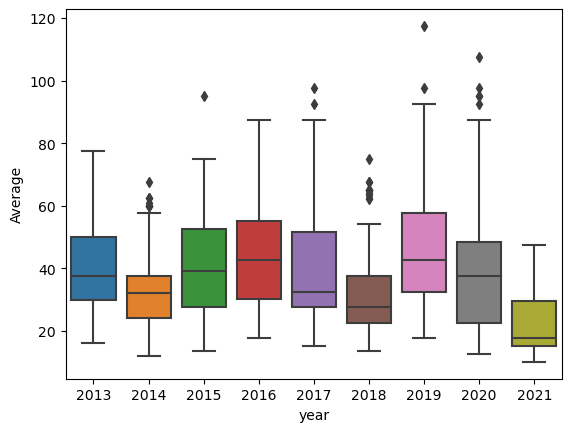

In [15]:
sns.boxplot(x='year', y='Average', data=df)

> The preceding plot shows that the average price range of the tomatoes was generally in the same alignment.

<AxesSubplot:xlabel='year', ylabel='Average'>

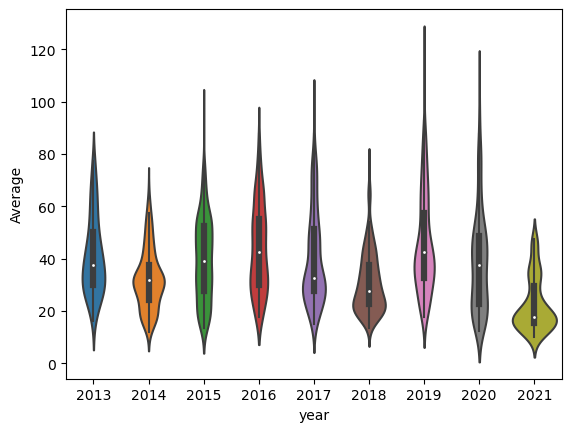

In [16]:
sns.violinplot(x='year', y='Average', data=df)

> I suppose this plot supports the claim I made previously.

> One more interesting thing to note is the fall in prices in 2020 from 2019 and in 2021 from 2020. After discussing with a few peeps, I came to the conclusion that this happened due to restrictions; the complete cycle of transportation was abruptly stopped, and henceforth tomatoes weren't sold or sold for peanut prices, and even farmers weren't able to recover their investments.

<AxesSubplot:xlabel='monthNo', ylabel='year'>

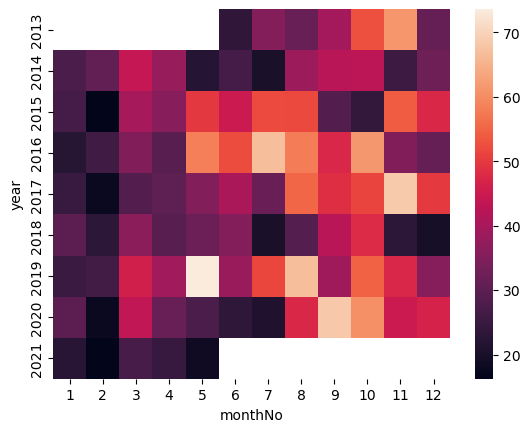

In [17]:
sns.heatmap (df.pivot_table(values='Average', index='year',columns='monthNo'))

From the above plot, we can see that prices are generally low in the period of January through February.

The reasons for it might be:
1. Reduced demand: In winter, people may be less likely to consume fresh tomatoes as they are less commonly used in seasonal dishes. This reduction in demand can lead to lower prices as farmers try to sell off their inventory. 
2. Imports: Some countries may import tomatoes from warmer regions during the winter months, which can increase the supply and lower prices.

p.s.: I couldn't find any claims or reports to back up these results. These are just my intuitions.

<AxesSubplot:xlabel='monthNo', ylabel='Minimum'>

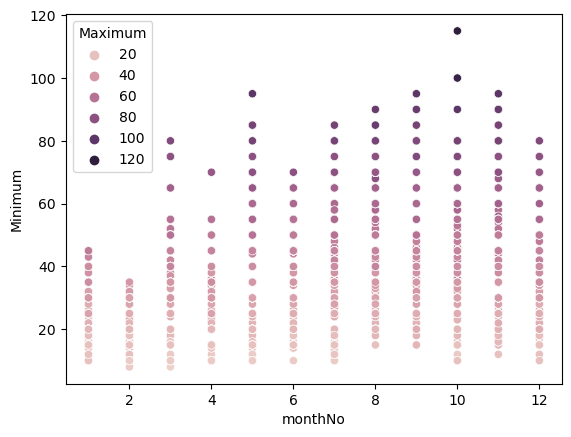

In [18]:
sns.scatterplot(x='monthNo', y='Minimum',hue='Maximum', data=df)

> From the above graph, we can conclude that in October the prices kind of peak.
> 
> Reason which I behind it is **Transportation costs**: In some cases, transportation costs may be higher in October due to increased demand for transportation services during the fall season. This can increase the cost of transporting tomatoes to market, which can lead to higher prices for consumers.

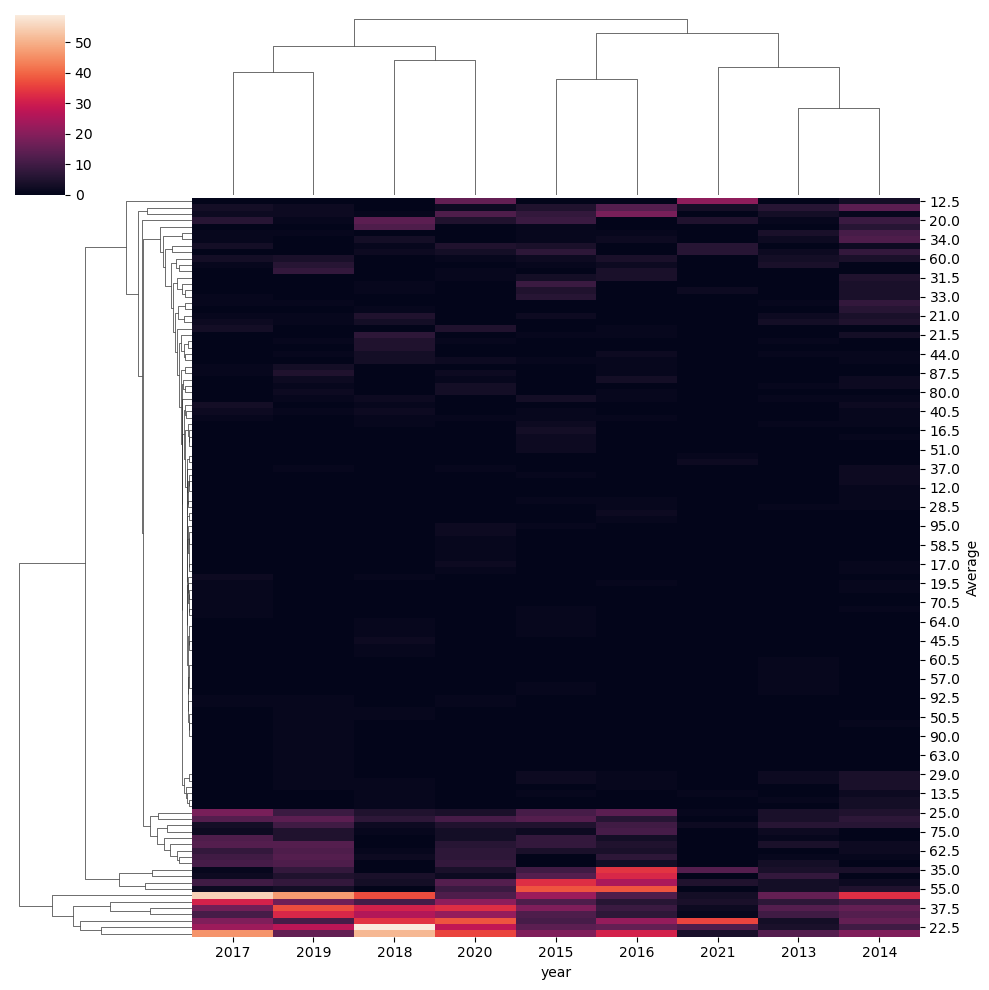

In [19]:
sns.clustermap(pd.crosstab(df['Average'],df['year']))

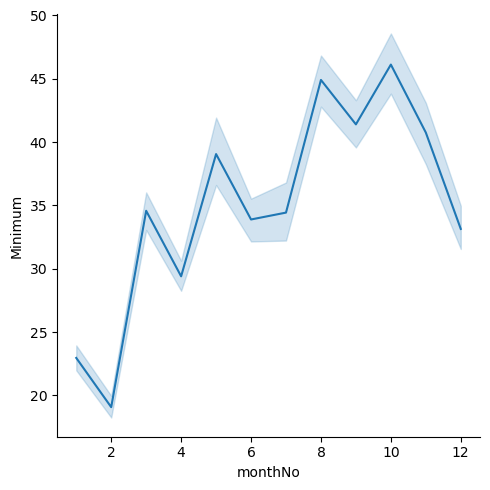

In [20]:
sns.relplot(
    data=df, kind="line",
    x="monthNo", y="Minimum",
    facet_kws=dict(sharex=False),
)

(array([1.42522512e-02, 2.22648805e-02, 3.00047394e-02, 1.31952661e-02,
        6.81925895e-03, 3.95517019e-03, 2.25035545e-03, 5.45540716e-04,
        1.36385179e-04, 3.40962948e-05]),
 array([  8. ,  18.7,  29.4,  40.1,  50.8,  61.5,  72.2,  82.9,  93.6,
        104.3, 115. ]),
 <BarContainer object of 10 artists>)

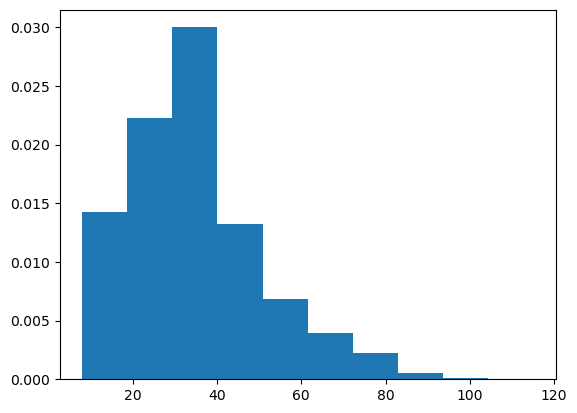

In [21]:
plt.hist(df['Minimum'],density=True,histtype='bar',)

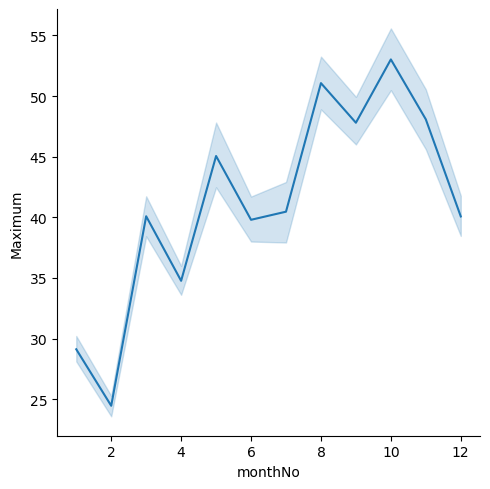

In [22]:
sns.relplot(
    data=df, kind="line",
    x="monthNo", y="Maximum",
    facet_kws=dict(sharex=False),
)

(array([1.22623536e-02, 2.22276271e-02, 2.15520153e-02, 1.94238383e-02,
        7.76953531e-03, 5.43867472e-03, 2.77000824e-03, 8.78295296e-04,
        2.02683530e-04, 6.75611766e-05]),
 array([ 12. ,  22.8,  33.6,  44.4,  55.2,  66. ,  76.8,  87.6,  98.4,
        109.2, 120. ]),
 <BarContainer object of 10 artists>)

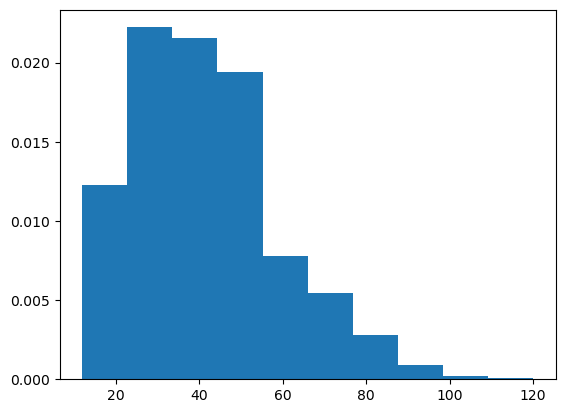

In [23]:
plt.hist(df['Maximum'],density=True,histtype='bar')

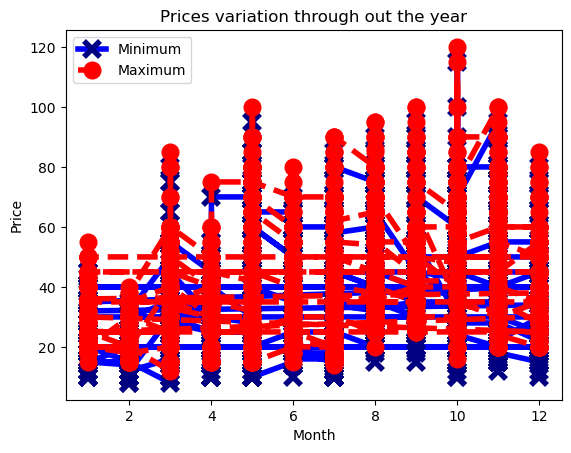

In [24]:
plt.plot(df.monthNo,df.Minimum,'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')

# Second line
plt.plot(df.monthNo,df.Maximum, 'r--o', linewidth=4, markersize=12,);

# Title
plt.title('Prices variation through out the year')

# Line labels
plt.legend(['Minimum', 'Maximum'])

# Axis labels
plt.xlabel('Month'); plt.ylabel('Price');

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


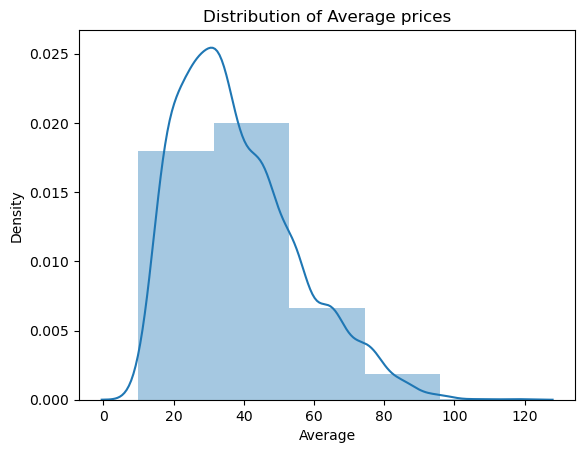

In [25]:
plt.title("Distribution of Average prices")

sns.distplot(df.Average,bins=5);

> Here we can see that average prices were generally in the range of 20-50

In [26]:
print(df.Average.skew())
df.Average.describe()

0.8227165567186671


count    2741.000000
mean       38.185516
std        16.970949
min        10.000000
25%        25.000000
50%        35.000000
75%        47.500000
max       117.500000
Name: Average, dtype: float64

> Mean of Average prices is **38.185516**

# The following are the conclusions I was able to map: 
**1. Tomato prices are normally low at the start of the year.** 

**2. Prices peak around the middle of October.** 

**3. Prices plummeted drastically during and after COVID.**

I still feel that I can extract more information from the given dataset.

Please upvote and comment. 😀🙌